# **GPU Acceleration in PyTorch: cuda() vs. .to(device)**

PyTorch provides easy GPU acceleration using CUDA. There are two common ways to move tensors or models to the GPU:

1. cuda()

2. .to(device)

# **1. Using cuda()**


The .cuda() method moves a tensor or model to the default CUDA device (cuda:0 by default).

# **Moving a Tensor to GPU**

In [1]:
import torch

x = torch.tensor([1.0, 2.0, 3.0])
x_gpu = x.cuda()  # Moves x to GPU
print(x_gpu.device)  # Output: cuda:0


cuda:0


If multiple GPUs are available, you can specify the device:

In [3]:
#x_gpu = x.cuda(1)  # Moves x to GPU 1

.cuda() only works if CUDA is available; otherwise, it will throw an error.

# **2. Using .to(device) (More Flexible)**

The .to(device) method is more generic and allows easy switching between CPU and GPU.

**Moving a Tensor Dynamically**

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.tensor([1.0, 2.0, 3.0])
x_gpu = x.to(device)  # Moves x to the chosen device
print(x_gpu.device)  # Output: cuda:0 (if GPU is available) or cpu


cuda:0


* This approach is better for writing device-agnostic code that runs on both CPU and GPU.



# **3. Moving a Model to GPU**

Both methods work for moving entire models to GPU.

**Using cuda()**

In [6]:
model = torch.nn.Linear(10, 5)  # Example model
model = model.cuda()  # Moves model to GPU
model

Linear(in_features=10, out_features=5, bias=True)

**Using .to(device)**

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.nn.Linear(10, 5)
model = model.to(device)  # Moves model to CPU or GPU dynamically
model

Linear(in_features=10, out_features=5, bias=True)

* Using .to(device) makes the code more portable.

# **4. Comparing cuda() vs. .to(device)**

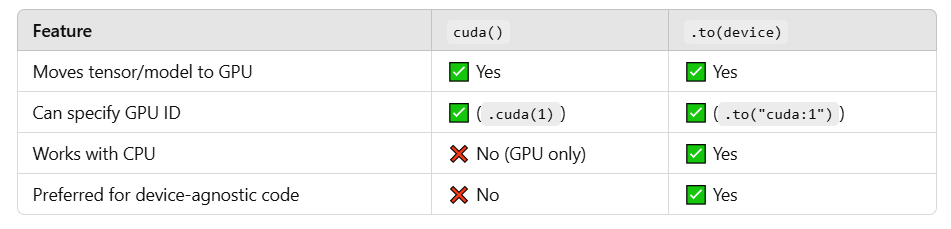

# **5. Best Practice: Always Use .to(device)**

For code that works on both CPU and GPU, always use .to(device), like this:

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a tensor
x = torch.tensor([1.0, 2.0, 3.0]).to(device)

# Define a model
model = torch.nn.Linear(10, 5).to(device)

# Forward pass
output = model(torch.rand(2, 10).to(device))


# **6. Checking GPU Availability**

Before using CUDA, check if it's available:

In [10]:
print(torch.cuda.is_available())  # True if GPU is available

True


Get the current GPU:

In [11]:
print(torch.cuda.current_device())  # GPU index
print(torch.cuda.device_count())    # Number of GPUs
print(torch.cuda.get_device_name(0))  # GPU name

0
1
Tesla T4


# **7. When to Use Which?**


* If only running on GPU, cuda() is fine.



* If switching between CPU & GPU, .to(device) is better.



* For multi-GPU, use .to("cuda:X") where X is the GPU index.